## 1. Importing Libraries and reading the data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
prev_appl_data = pd.read_csv("previous_application.csv")
curr_appl_data = pd.read_csv("application_data.csv")

## 2. Performing Descriptive Analysis on the Raw Data

In [6]:
prev_appl_data.shape

(1670214, 37)

In [7]:
curr_appl_data.shape

(307511, 122)

In [8]:
prev_appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
curr_appl_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [10]:
####Finding null percentages for columns
S = curr_appl_data.isnull().sum()
S1 = round(S*100/curr_appl_data.shape[0],2)
pd.options.display.max_rows = 15
pd.DataFrame(S1)
S1

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

## 3. Filling NA values and dropping columns

In [11]:
###### Dropping columns where there are more than 40% null values

dropColList = list(S1[S1 > 40].index)

In [12]:
# Dropping columns from current application data which we felt are not relevant.

dropColList.extend(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                   'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
                   'AMT_REQ_CREDIT_BUREAU_YEAR'])


In [13]:
##### Checking Value counts for columns which have very few discrete values to come to a conclusion for relevance

######Fetching records where there is payment difficulty i.e target variable = 1

curr_appl_data_payDifficulties = curr_appl_data[curr_appl_data['TARGET'] == 1]

In [14]:
##### Checking the Contact or WorkAddress related columns value counts against target Variable . 
##### Checking for records only where there is payment difficulty i.e target = 1

columns_list = ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

finalDFWorkAddress = pd.DataFrame()
for i in columns_list:
    Scheck = curr_appl_data_payDifficulties[i].value_counts(normalize=True)
    finalDFWorkAddress.loc[:, i] = Scheck
    
finalDFWorkAddress

##### Based on the o/p we can drop the columns 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION' ,LIVE_REGION_NOT_WORK_REGION
### 'REG_CITY_NOT_LIVE_CITY' as most of the records have same value 

,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,0.982558,0.944089,0.957462,0.881611,0.69708,0.778328
1,0.017442,0.055911,0.042538,0.118389,0.30292,0.221672


In [15]:
##### Checking the Id proof/Documents submitted value counts against target Variable . 
##### Checking for records only where there is payment difficulty i.e target = 1

DocumentsColumnList  = []
for i in curr_appl_data_payDifficulties.columns:
    if i.startswith('FLAG_DOCUMENT'):
        DocumentsColumnList.append(i)


finalDFDocumentFlag = pd.DataFrame()

for i in DocumentsColumnList:
    Scheck = curr_appl_data_payDifficulties[i].value_counts(normalize=True)
    finalDFDocumentFlag.loc[:, i] = Scheck
    
finalDFDocumentFlag

##### All The Flag Document columns can be dropped apart from FlagDocument3 as all the columns have value as 0 for more than 99% of records

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0.999839,0.222075,1.0,0.985015,0.939295,0.999879,0.926042,0.997019,1.0,0.996979,1.0,0.998792,0.998792,0.999557,0.993958,0.999919,0.99428,0.999517,0.999476,0.999436
1,0.000161,0.777925,NaN,0.014985,0.060705,0.000121,0.073958,0.002981,NaN,0.003021,NaN,0.001208,0.001208,0.000443,0.006042,0.000081,0.00572,0.000483,0.000524,0.000564


In [16]:
DocumentsColumnList.remove('FLAG_DOCUMENT_3')

In [17]:
##### Checking the Contact Details  value counts against target Variable . 
##### Checking for records only where there is payment difficulty i.e target = 1

ContactFlagColumnsList = ['FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

finalDFContactFlag = pd.DataFrame()

for i in ContactFlagColumnsList:
    Scheck = curr_appl_data_payDifficulties[i].value_counts(normalize=True)
    finalDFContactFlag.loc[:, i] = Scheck
    
finalDFContactFlag
##### Flag_Emp_Phone,Flag_Cont_Mobile Can be dropped as the majority have the values as 1

,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL
1,0.879517,0.237825,0.998187,0.244955,0.055347
0,0.120483,0.762175,0.001813,0.755045,0.944653


In [15]:
curr_appl_data_payDifficulties['FLAG_MOBIL'].value_counts(normalize=True)

### Can Drop the column FLAG_MOBIL as well as all the records have the value as 1

1    1.0
Name: FLAG_MOBIL, dtype: float64

In [16]:
dropColList.extend(['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY'])
dropColList.extend(DocumentsColumnList)


In [18]:
dropColList.extend(['FLAG_EMP_PHONE','FLAG_MOBIL','FLAG_CONT_MOBILE'])

In [19]:
dropColList

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [20]:
loan_data = curr_appl_data.copy()

In [21]:
loan_data.drop(columns=dropColList,axis=1,inplace=True)

In [258]:
pd.options.display.max_rows = None
(loan_data.isnull().sum()/len(loan_data))*100


SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
OCCUPATION_TYPE 

In [204]:
loan_data['CNT_FAM_MEMBERS'].median()

2.0

In [206]:
###### Replacing null values in Count of Family Members Column with Median Value
loan_data['CNT_FAM_MEMBERS'] = loan_data['CNT_FAM_MEMBERS'].fillna(loan_data['CNT_FAM_MEMBERS'].median())

In [209]:
loan_data['CNT_FAM_MEMBERS'] = loan_data['CNT_FAM_MEMBERS'].astype(int)

In [245]:
loan_data['AMT_ANNUITY'].isnull().sum()

12

In [246]:
#### As the number of Records having Annuity Amount as null is very minimal
#### i.e 12 records of entire data set we can replace with median
loan_data['AMT_ANNUITY'] = loan_data['AMT_ANNUITY'].fillna(loan_data['AMT_ANNUITY'].median())

In [247]:
loan_data['AMT_ANNUITY'].isnull().sum()

0

In [527]:
loan_data['AMT_GOODS_PRICE'].isnull().sum()

0

In [525]:
loan_data['AMT_GOODS_PRICE'].isnull().sum()/loan_data.shape[0]

0.0009040327012692228

In [526]:
#### As the number of Records having Annuity Amount as null is very minimal percent
#### we can replace with median
loan_data['AMT_GOODS_PRICE'] = loan_data['AMT_GOODS_PRICE'].fillna(loan_data['AMT_GOODS_PRICE'].median())

In [528]:
loan_data['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [529]:
loan_data['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [49]:
#### Checking for Columns Which have values as XNA . Here Gender Can be either Male or Female . 
#### 4 records have value as XNA . As the mode is Female we can replace those 4 records value as F there wont be much impact
loan_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [53]:
loan_data['CODE_GENDER'] = loan_data['CODE_GENDER'].replace('XNA','F')

In [54]:
#### We can observe now the XNA values are replaced
loan_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [503]:
###### Family Status of the Client Correction of Few Records. 2 Records have value Unknown
###### This can be replaced by Mode value i.e Married. It wouldnt affect the analysis
loan_data.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [504]:
loan_data['NAME_FAMILY_STATUS']= loan_data['NAME_FAMILY_STATUS'].replace('Unknown','Married')

In [505]:
##### Now Recheck the Data if the records are cleansed
loan_data.NAME_FAMILY_STATUS.value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

In [257]:
loan_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [263]:
loan_data_occupationTypeBlank = loan_data[loan_data['OCCUPATION_TYPE'].isnull()]

In [287]:
loan_data_occupationTypeNotBlank = loan_data[~loan_data['OCCUPATION_TYPE'].isnull()]

In [288]:
loan_data_occupationTypeNotBlank.shape

(211120, 43)

In [284]:
loan_data_occupationTypeBlank[(loan_data_occupationTypeBlank['AMT_INCOME_TOTAL']>90000) & (loan_data_occupationTypeBlank['AMT_INCOME_TOTAL']<180000)].shape

(41484, 43)

In [286]:
loan_data_occupationTypeBlank[(loan_data_occupationTypeBlank['AMT_INCOME_TOTAL']>180000) & (loan_data_occupationTypeBlank['AMT_INCOME_TOTAL']<180000000)].shape

(23540, 43)

In [283]:
loan_data_occupationTypeBlank.AMT_INCOME_TOTAL.describe()

count    9.639100e+04
mean     1.535160e+05
std      1.150286e+05
min      2.565000e+04
25%      9.000000e+04
50%      1.350000e+05
75%      1.800000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

In [535]:
loan_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

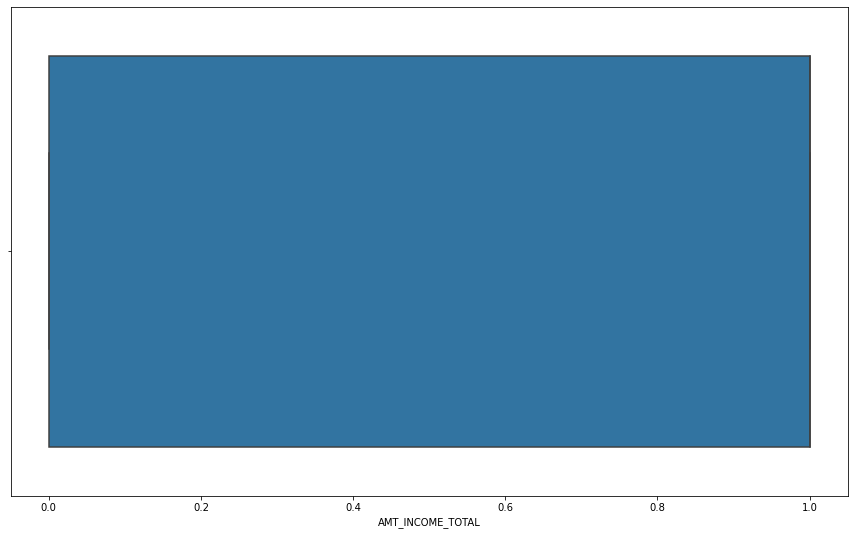

In [523]:
plt.figure(figsize=[15,9])
sns.boxplot((loan_data_occupationTypeBlank['AMT_INCOME_TOTAL']>100000) & (loan_data_occupationTypeBlank['AMT_INCOME_TOTAL']<300000))
plt.show()


In [513]:
loan_data[loan_data['AMT_INCOME_TOTAL'] > 300000].shape

(22739, 43)

In [282]:
loan_data.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
OCCUPATION_TYPE,,,,,,,,
Accountants,9813.0,194578.357842,108876.812807,27000.0,130500.0,178650.0,225000.0,2214117.0
Cleaning staff,4653.0,130790.895551,64075.793833,25650.0,90000.0,112500.0,157500.0,1080000.0
Cooking staff,5946.0,138396.508176,62742.083077,27000.0,90000.0,126000.0,171000.0,540000.0
Core staff,27570.0,172656.695254,98147.105697,27000.0,112500.0,157500.0,202500.0,3600000.0
Drivers,18603.0,187011.606413,82593.382899,27000.0,135000.0,180000.0,225000.0,2475000.0
HR staff,563.0,188916.282416,93155.321259,30600.0,135000.0,158400.0,225000.0,699750.0
High skill tech staff,11380.0,182842.045683,95711.001374,27000.0,112500.0,157500.0,225000.0,1890000.0
IT staff,526.0,213465.601711,142009.791936,45000.0,135000.0,180000.0,247500.0,2025000.0
Laborers,55186.0,166357.482525,504164.664318,27000.0,112500.0,157500.0,202500.0,117000000.0


In [560]:
def plot_func(dim):
    loan_data_Analysis_by_dim = loan_data.loc[:,['TARGET',dim,'SK_ID_CURR']]
    denom=loan_data_Analysis_by_dim.groupby(dim).count()
    numer=loan_data_Analysis_by_dim.groupby([dim,'TARGET']).count()
    final_dim_proportionatedata = round(numer*100/denom,2)
    final_dim_proportionatedata.drop(columns=['TARGET'],inplace=True)
    figure, axes = plt.subplots(1, 2)
    final_dim_proportionatedata.iloc[1::2].sort_values('SK_ID_CURR').plot(kind='bar',figsize=(15,8),ax=axes[0],title="Defaulters by " + dim)
    final_dim_proportionatedata.iloc[0::2].sort_values('SK_ID_CURR').plot(kind='bar',figsize=(15,8),ax=axes[1],title="Non-Defaulters " + dim)

In [26]:
loan_data_Target0 = loan_data[loan_data['TARGET'] == 0]
loan_data_Target1 = loan_data[loan_data['TARGET'] == 1]

In [28]:
def testing(dataframe,dim):
    fig = plt.figure(figsize=(13,10))
    ax1 = plt.subplot(221)
    dataframe[dim].value_counts().plot.pie(autopct = "%1.0f%%" , ax = ax1)
    plt.title("Pic Chart")
    ax2 = plt.subplot(222)
    sns.countplot(x=dim,hue='TARGET',data=dataframe,ax=ax2)
    plt.xticks(rotation=90)
    plt.title("Plotting data for target in terms of total count")
    ax3 = plt.subplot(223)
    df=pd.DataFrame()
    df['0'] = ((loan_data_Target0[dim].value_counts())/len(loan_data_Target0))
    df['1'] = ((loan_data_Target1[dim].value_counts())/len(loan_data_Target1))
    df.plot.bar(ax=ax3)
    plt.title("plotting data in terms of percentage")
    fig.tight_layout()
    plt.show()

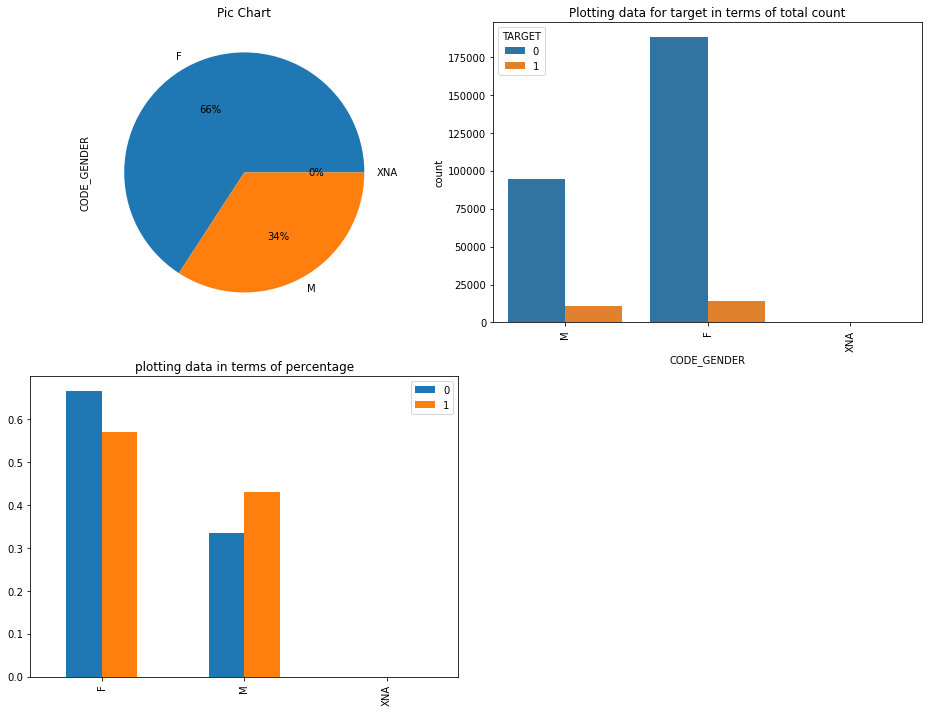

In [29]:
testing(loan_data,'CODE_GENDER')

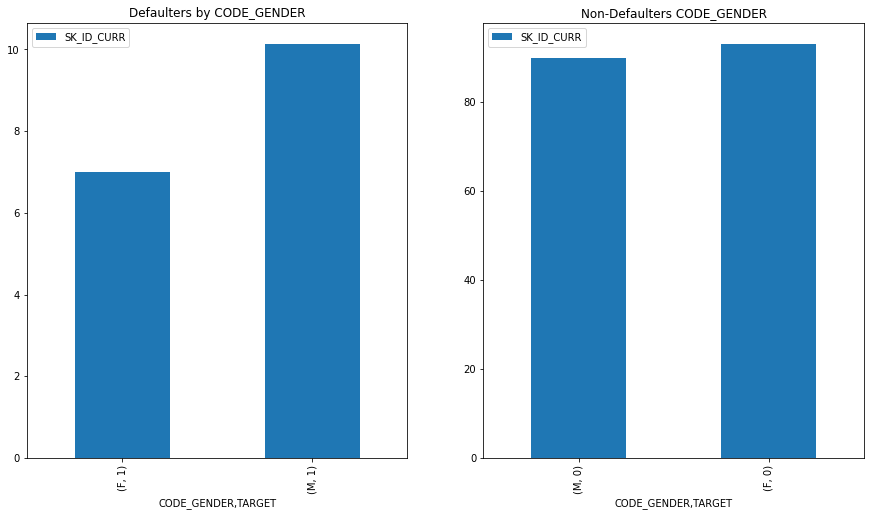

In [563]:
plot_func('CODE_GENDER')

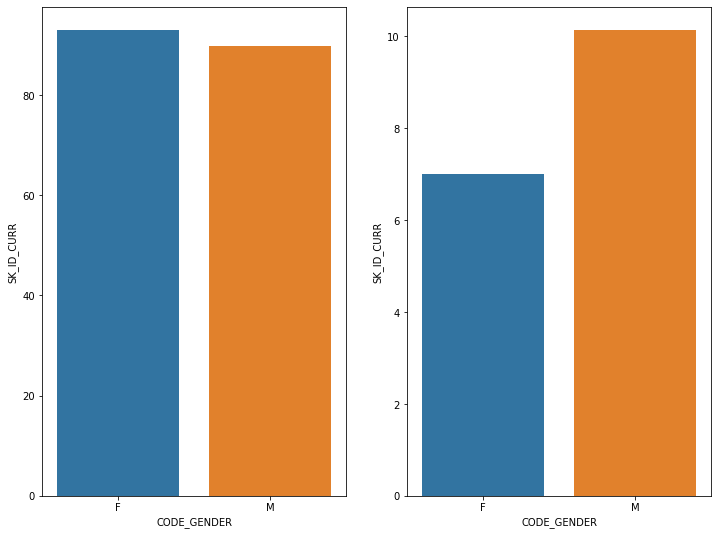

In [578]:
df10 = final_GenderTarget_Proportions.reset_index()
Target0_Data = df10[df10['TARGET'] == 0].sort_values(by='CODE_GENDER')
Target1_Data = df10[df10['TARGET'] == 1].sort_values(by='CODE_GENDER')
plt.figure(figsize=[12,9])
plt.subplot(1,2,1)
sns.barplot(x=Target0_Data['CODE_GENDER'],y=Target0_Data['SK_ID_CURR'])
plt.subplot(1,2,2)
sns.barplot(x=Target1_Data['CODE_GENDER'],y=Target1_Data['SK_ID_CURR'])
plt.show()

 # UniVariate Analysis

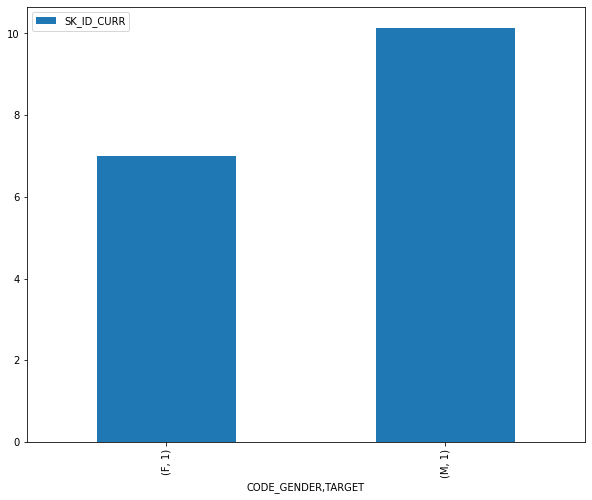

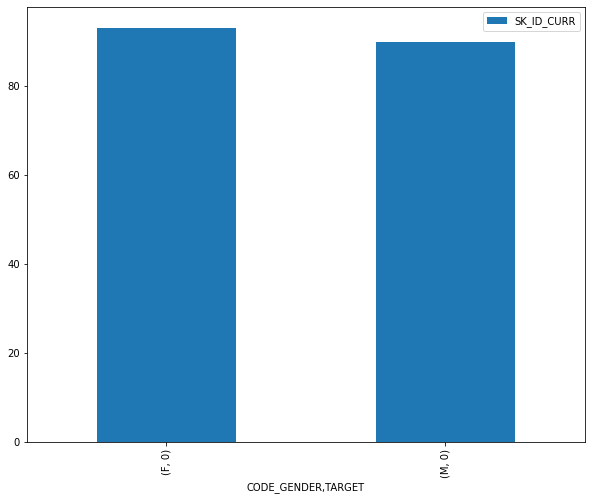

In [569]:
loan_data_GenderTarget = loan_data.loc[:,['TARGET','CODE_GENDER','SK_ID_CURR']]
denom=loan_data_GenderTarget.groupby('CODE_GENDER').count()
numer=loan_data_GenderTarget.groupby(['CODE_GENDER','TARGET']).count()
final_GenderTarget_Proportions = round(numer*100/denom,2)
final_GenderTarget_Proportions.drop(columns=['TARGET'],inplace=True)
final_GenderTarget_Proportions.iloc[1::2].plot(kind='bar',figsize=(10,8))
final_GenderTarget_Proportions.iloc[0::2].plot(kind='bar',figsize=(10,8))

In [289]:
#######Occupation Type Analysis
loan_data_occupationTypeNotBlank.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

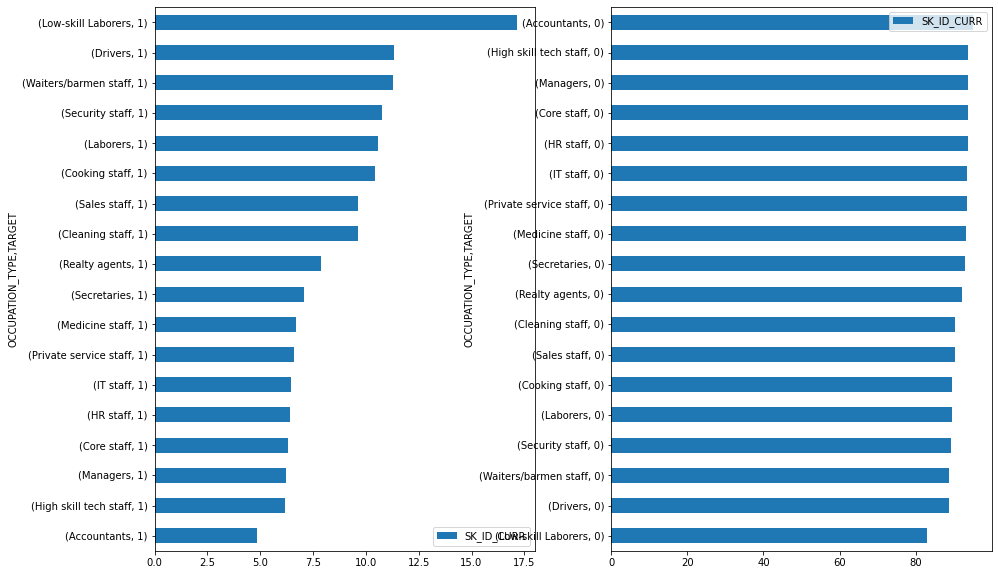

In [474]:
loan_data_OcuupationTypeTarget = loan_data_occupationTypeNotBlank.loc[:,['TARGET','OCCUPATION_TYPE','SK_ID_CURR']]
denom=loan_data_OcuupationTypeTarget.groupby('OCCUPATION_TYPE').count()
numer=loan_data_OcuupationTypeTarget.groupby(['OCCUPATION_TYPE','TARGET']).count()
final_OccupationTypeTarget_Proportions = round(numer*100/denom,2)
final_OccupationTypeTarget_Proportions
final_OccupationTypeTarget_Proportions.drop(columns=['TARGET'],inplace=True)
figure, axes = plt.subplots(1, 2)
final_OccupationTypeTarget_Proportions.iloc[1::2].sort_values('SK_ID_CURR').plot(kind='barh',figsize=(15,10),ax=axes[0])
final_OccupationTypeTarget_Proportions.iloc[0::2].sort_values('SK_ID_CURR').plot(kind='barh',figsize=(15,10),ax=axes[1])

In [415]:
#####Organization Type Analysis
loan_data_organizationTypeNotBlank = loan_data[loan_data['ORGANIZATION_TYPE'] != 'XNA']

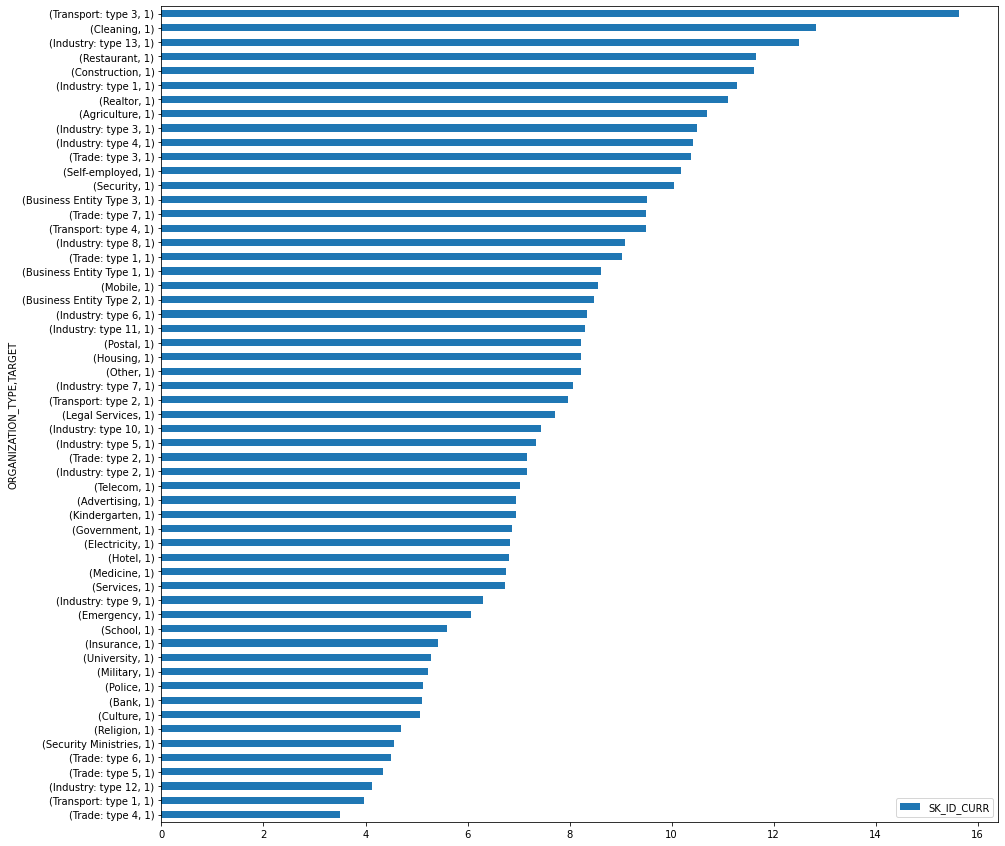

In [426]:
loan_data_organizationTypeTarget = loan_data_occupationTypeNotBlank.loc[:,['TARGET','ORGANIZATION_TYPE','SK_ID_CURR']]
denom=loan_data_organizationTypeTarget.groupby('ORGANIZATION_TYPE').count()
numer=loan_data_organizationTypeTarget.groupby(['ORGANIZATION_TYPE','TARGET']).count()
final_organizationTypeTarget_Proportions = numer*100/denom
final_organizationTypeTarget_Proportions
final_organizationTypeTarget_Proportions.drop(columns=['TARGET'],inplace=True)
final_organizationTypeTarget_Proportions.iloc[1::2].sort_values('SK_ID_CURR').plot(kind='barh',figsize=(15,15))


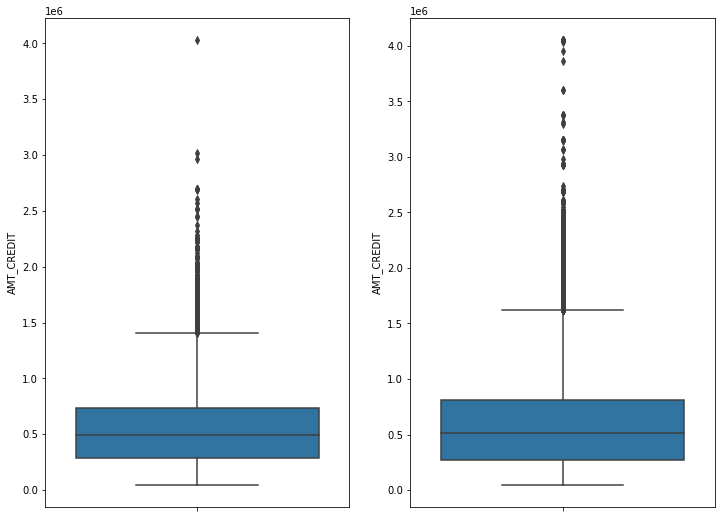

In [378]:
##### Loan Amt Analysis
loan_data_Target1 = loan_data[loan_data['TARGET']== 1]
loan_data_Target0 = loan_data[loan_data['TARGET']== 0]
plt.figure(figsize=[12,9])
plt.subplot(1,2,1)
sns.boxplot(loan_data_Target1['AMT_CREDIT'],orient='v')
plt.subplot(1,2,2)
sns.boxplot(loan_data_Target0['AMT_CREDIT'],orient='v')
plt.show()

In [337]:
loan_data_Target1[loan_data_Target1['AMT_CREDIT'] < 1000000].shape[0]/loan_data_Target1.shape[0]

0.8818932527693857

In [338]:
loan_data_Target0[loan_data_Target0['AMT_CREDIT'] < 1000000].shape[0]/loan_data_Target0.shape[0]

0.8335502996257331

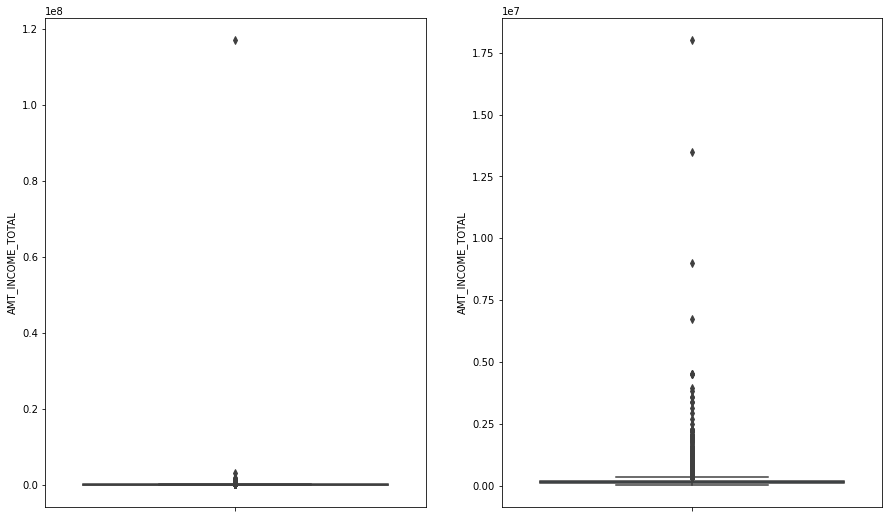

In [382]:
plt.figure(figsize=[15,9])
plt.subplot(1,2,1)
sns.boxplot(loan_data_Target1['AMT_INCOME_TOTAL'],orient='v')
plt.subplot(1,2,2)
sns.boxplot(loan_data_Target0['AMT_INCOME_TOTAL'],orient='v')
plt.show()

In [364]:
loan_data_Target1[(loan_data_Target1['AMT_INCOME_TOTAL']>100000) & (loan_data_Target1['AMT_INCOME_TOTAL']<300000)].shape[0]/loan_data_Target1.shape[0]

0.7350251762336355

In [368]:
loan_data_Target0[(loan_data_Target0['AMT_INCOME_TOTAL']>100000) & (loan_data_Target0['AMT_INCOME_TOTAL']<300000)].shape[0]/loan_data_Target0.shape[0]

0.717499274813751

In [374]:
loan_data_Target0[loan_data_Target0['AMT_INCOME_TOTAL']>100000].shape[0]/loan_data_Target0.shape[0]

0.7931521193125942

In [131]:
#### Creating Age Column based on Days_Birth
loan_data['Age'] = abs(round((loan_data['DAYS_BIRTH'].replace('-',''))/365,2)).astype(int)

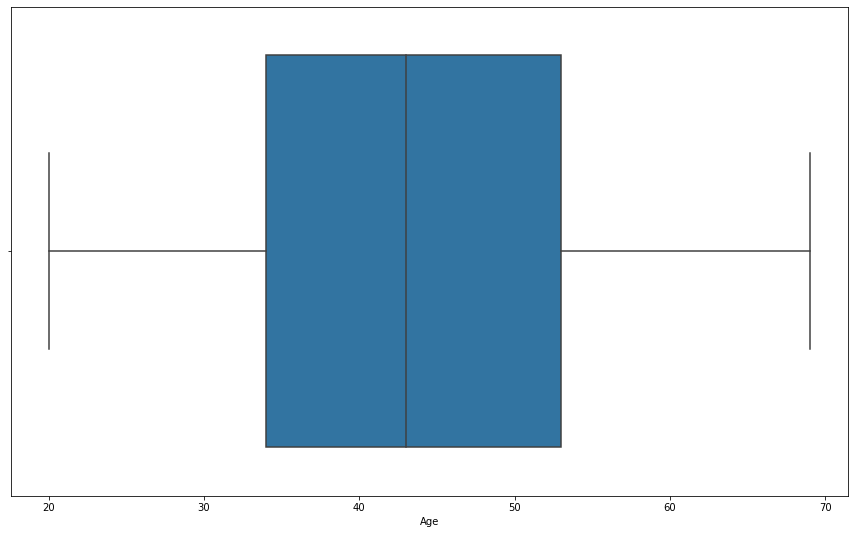

In [133]:
plt.figure(figsize=[15,9])
sns.boxplot(loan_data['Age'])
plt.show()

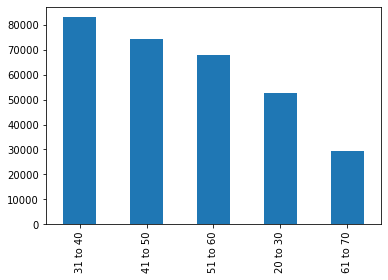

In [146]:
##### Creating bins and plotting Histogram based on the bins 
loan_data['Age_Group'] = pd.cut(x=loan_data['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20 to 30', '31 to 40', '41 to 50', '51 to 60', '61 to 70']) 
loan_data.loc[:,'Age_Group'].value_counts().plot(kind='bar')

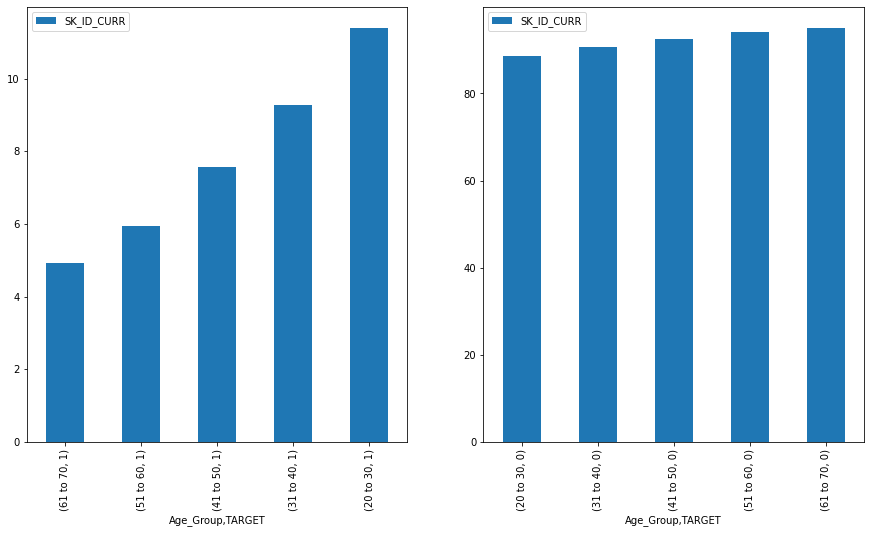

In [477]:
loan_data_ageTarget = loan_data.loc[:,['TARGET','Age_Group','SK_ID_CURR']]
denom=loan_data_ageTarget.groupby('Age_Group').count()
numer=loan_data_ageTarget.groupby(['Age_Group','TARGET']).count()
final_AgeTarget_Props = round(numer*100/denom,2)
final_AgeTarget_Props.drop(columns=['TARGET'],inplace=True)
figure, axes = plt.subplots(1, 2)
final_AgeTarget_Props.iloc[1::2].sort_values('SK_ID_CURR').plot(kind='bar',figsize=(15,8),ax=axes[0])
final_AgeTarget_Props.iloc[0::2].sort_values('SK_ID_CURR').plot(kind='bar',figsize=(15,8),ax=axes[1])

In [297]:
loan_data['ORGANIZATION_TYPE'].value_counts(normalize=True)

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

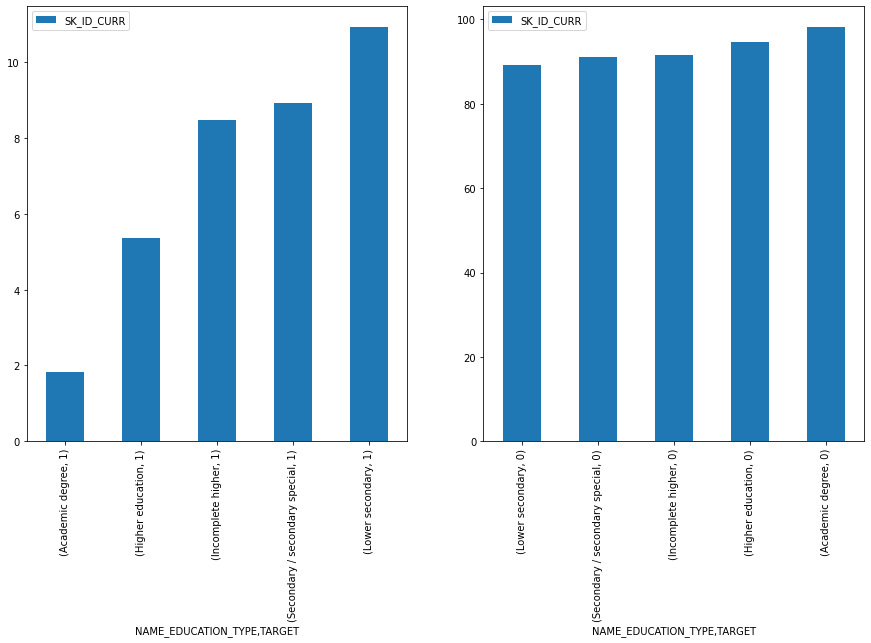

In [486]:
loan_data_EducationTypeTarget = loan_data.loc[:,['TARGET','NAME_EDUCATION_TYPE','SK_ID_CURR']]
denom=loan_data_EducationTypeTarget.groupby('NAME_EDUCATION_TYPE').count()
numer=loan_data_EducationTypeTarget.groupby(['NAME_EDUCATION_TYPE','TARGET']).count()
final_EduTarget_Props = round(numer*100/denom,2)
final_EduTarget_Props.drop(columns=['TARGET'],inplace=True)
final_EduTarget_Props
figure, axes = plt.subplots(1, 2)
final_EduTarget_Props.iloc[1::2].sort_values('SK_ID_CURR').plot(kind='bar',figsize=(15,8),ax=axes[0])
final_EduTarget_Props.iloc[0::2].sort_values('SK_ID_CURR').plot(kind='bar',figsize=(15,8),ax=axes[1])

In [448]:
######### Count of Children . Number of Children > 5 is minimal in the data set . More than 99 % of the data has less than 5 children 
loan_data[loan_data['CNT_CHILDREN'] > 5].shape[0]/loan_data.shape[0]
loan_data_byChildren = loan_data[loan_data['CNT_CHILDREN'] < 5]

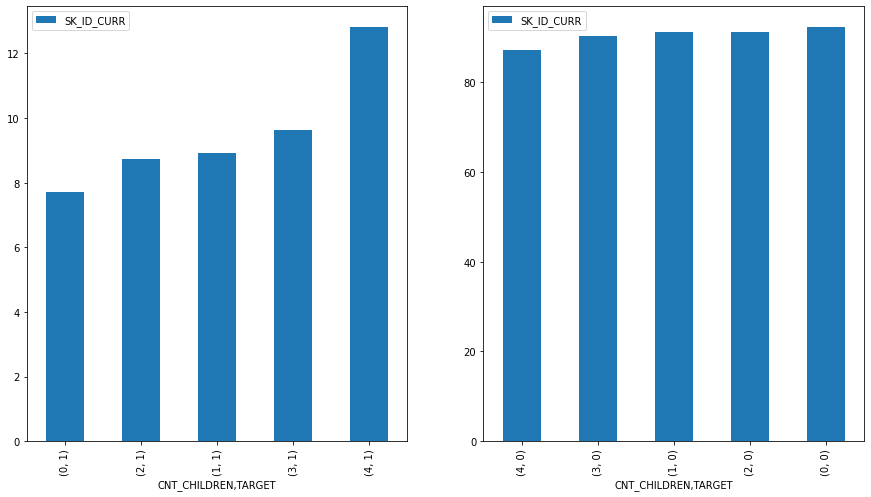

In [470]:
loan_data_childrenTarget = loan_data_byChildren.loc[:,['TARGET','CNT_CHILDREN','SK_ID_CURR']]
denom=loan_data_childrenTarget.groupby('CNT_CHILDREN').count()
numer=loan_data_childrenTarget.groupby(['CNT_CHILDREN','TARGET']).count()
final_ChildrenTarget_Props = round(numer*100/denom,2)
final_ChildrenTarget_Props.drop(columns=['TARGET'],inplace=True)

figure, axes = plt.subplots(1, 2)
final_ChildrenTarget_Props.iloc[1::2].sort_values('SK_ID_CURR').plot(kind='bar',figsize=(15,8),ax=axes[0])
final_ChildrenTarget_Props.iloc[0::2].sort_values('SK_ID_CURR').plot(kind='bar',figsize=(15,8),ax=axes[1])

In [487]:
######Living with Parents or not
loan_data['NAME_HOUSING_TYPE'].value_counts(normalize=True)

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64

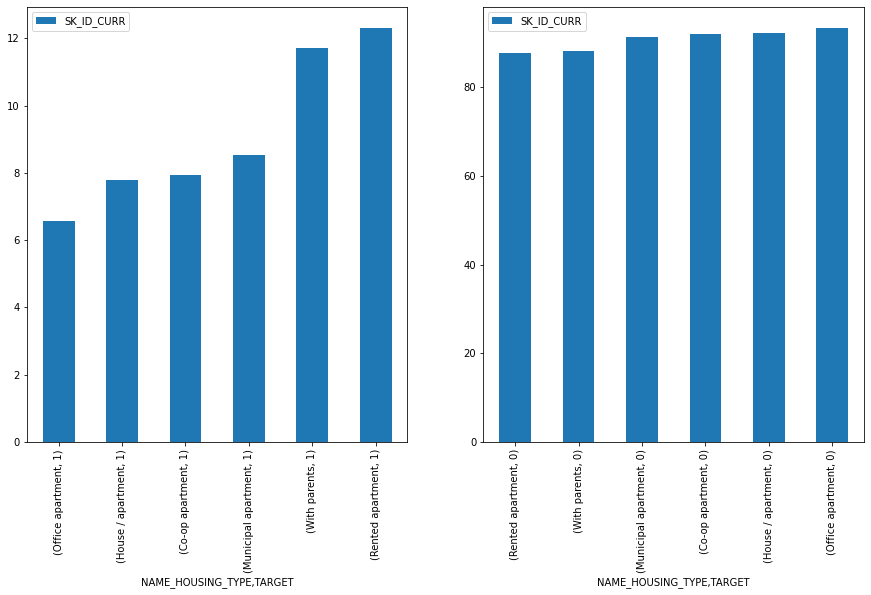

In [500]:
loan_data_livingWithParents = loan_data.loc[:,['TARGET','NAME_HOUSING_TYPE','SK_ID_CURR']]
denom=loan_data_livingWithParents.groupby('NAME_HOUSING_TYPE').count()
numer=loan_data_livingWithParents.groupby(['NAME_HOUSING_TYPE','TARGET']).count()
final_HousingTypeTarget_Props = round(numer*100/denom,2)
final_HousingTypeTarget_Props.drop(columns=['TARGET'],inplace=True)

figure, axes = plt.subplots(1, 2)
final_HousingTypeTarget_Props.iloc[1::2].sort_values('SK_ID_CURR').plot(kind='bar',figsize=(15,8),ax=axes[0])
final_HousingTypeTarget_Props.iloc[0::2].sort_values('SK_ID_CURR').plot(kind='bar',figsize=(15,8),ax=axes[1])



In [499]:
###### Family Status of the client

loan_data['NAME_FAMILY_STATUS'].value_counts(normalize=True)

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

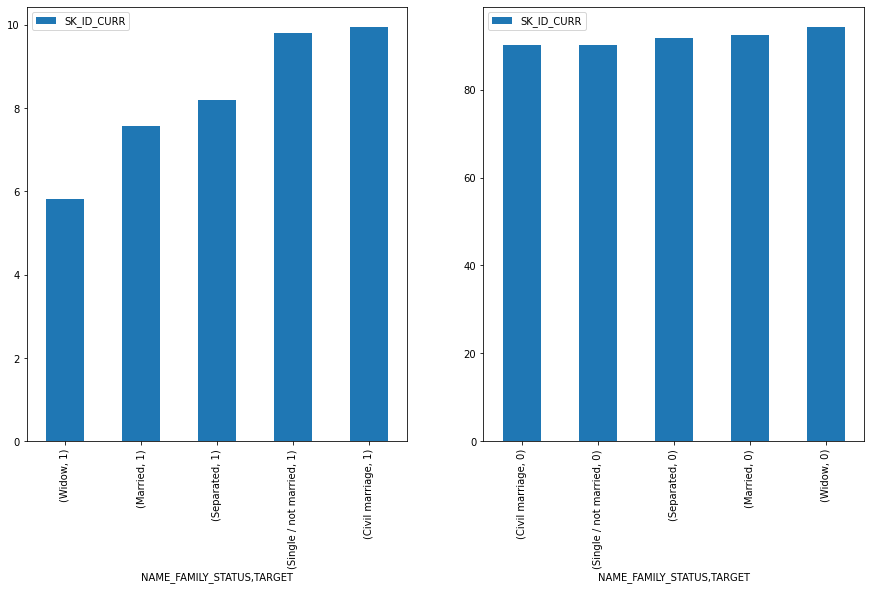

In [506]:
loan_data_FamiltyStatus = loan_data.loc[:,['TARGET','NAME_FAMILY_STATUS','SK_ID_CURR']]
denom=loan_data_FamiltyStatus.groupby('NAME_FAMILY_STATUS').count()
numer=loan_data_FamiltyStatus.groupby(['NAME_FAMILY_STATUS','TARGET']).count()
final_FamilyStatus_Props = round(numer*100/denom,2)
final_FamilyStatus_Props.drop(columns=['TARGET'],inplace=True)
figure, axes = plt.subplots(1, 2)
final_FamilyStatus_Props.iloc[1::2].sort_values('SK_ID_CURR').plot(kind='bar',figsize=(15,8),ax=axes[0])
final_FamilyStatus_Props.iloc[0::2].sort_values('SK_ID_CURR').plot(kind='bar',figsize=(15,8),ax=axes[1])

In [230]:
loan_data_target0 = loan_data[loan_data['TARGET'] == 0]
loan_data_target1 = loan_data[loan_data['TARGET'] == 1]
loan_data_target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,Age,Age_Group
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,1,45,41 to 50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,52,51 to 60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,1,52,51 to 60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,54,51 to 60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,1,46,41 to 50


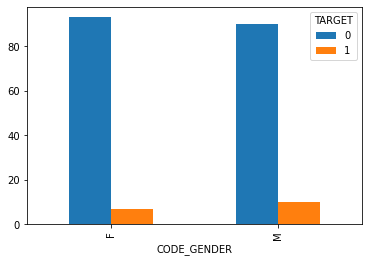

In [119]:
pivot_genderDF= pd.pivot_table(data = loan_data, index='CODE_GENDER', columns='TARGET',values='SK_ID_CURR',aggfunc='count')
pivot_genderDF

FemaleApplicants = loan_data[loan_data['CODE_GENDER'] == 'F'].shape[0]
MaleApplicants = loan_data[loan_data['CODE_GENDER'] == 'M'].shape[0]

pivot_genderDF.iloc[0,:] = (pivot_genderDF.iloc[0,:] / FemaleApplicants) * 100
pivot_genderDF.iloc[1,:] = (pivot_genderDF.iloc[1,:] / MaleApplicants) * 100

pivot_genderDF.plot(kind='bar')

In [55]:
#####ORGANIZATION_TYPE
loan_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

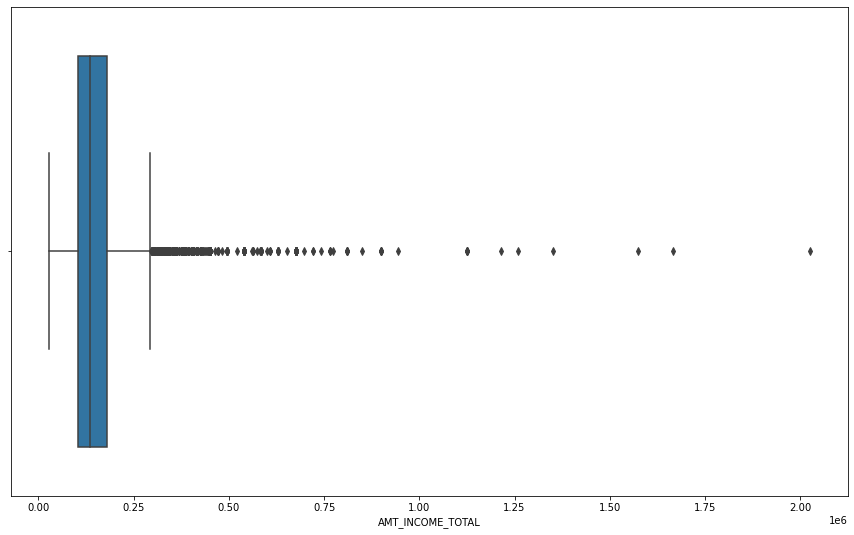

In [45]:
plt.figure(figsize=[15,9])
sns.boxplot(Sales_LoanData.AMT_INCOME_TOTAL)
plt.show()

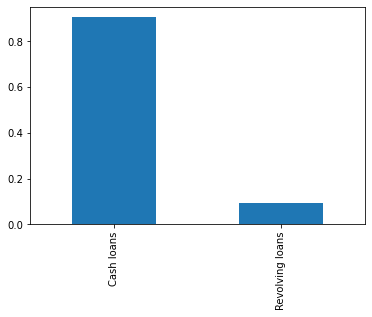

In [86]:
#### Clearly the data has more Cash loans than Revolving Loans
loan_data.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()

In [87]:
####### The defaulters or the applicants with payment difficulties is not significant in any of the cateogories.
#### 8 % of Cash loan applicants are having payment difficulties and 5 % of Revolving loans having payment Difficulties

pivot_df = pd.pivot_table(data = loan_data, index='NAME_CONTRACT_TYPE', columns='TARGET',values='SK_ID_CURR',aggfunc='count')
pivot_df

totalCashLoans = loan_data[loan_data['NAME_CONTRACT_TYPE'] == 'Cash loans'].shape[0]
totalRevolvingLoans = loan_data[loan_data['NAME_CONTRACT_TYPE'] == 'Revolving loans'].shape[0]

pivot_df.iloc[0,:] = (pivot_df.iloc[0,:] / totalCashLoans) * 100
pivot_df.iloc[1,:] = (pivot_df.iloc[1,:] / totalRevolvingLoans) * 100

pivot_df

TARGET,0,1
NAME_CONTRACT_TYPE,,
Cash loans,91.654087,8.345913
Revolving loans,94.521671,5.478329


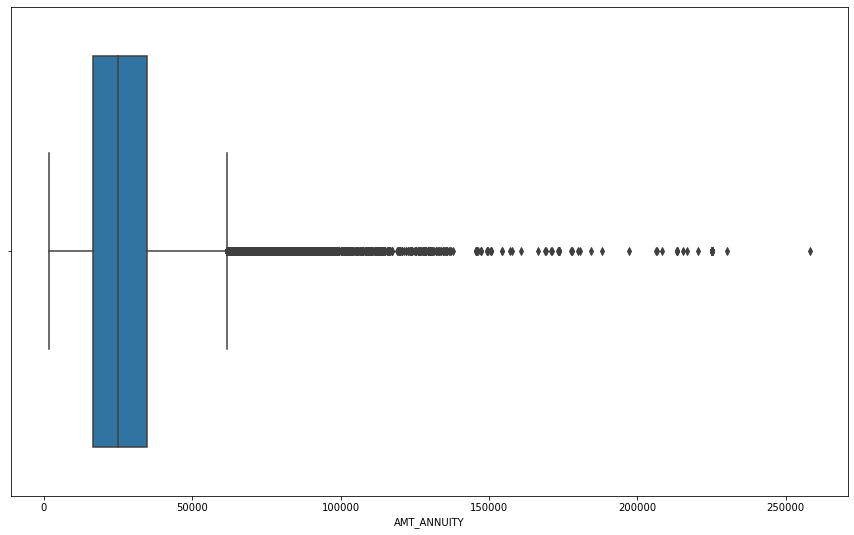

In [21]:
####### Of the entire data set only 1% of the records have an annuity of more than 70000 
plt.figure(figsize=[15,9])
sns.boxplot(curr_appl_data.AMT_ANNUITY)
plt.show()

In [42]:
(curr_appl_data[curr_appl_data['AMT_ANNUITY']>70000].shape[0]/curr_appl_data.shape[0])*100

1.0019153786368618

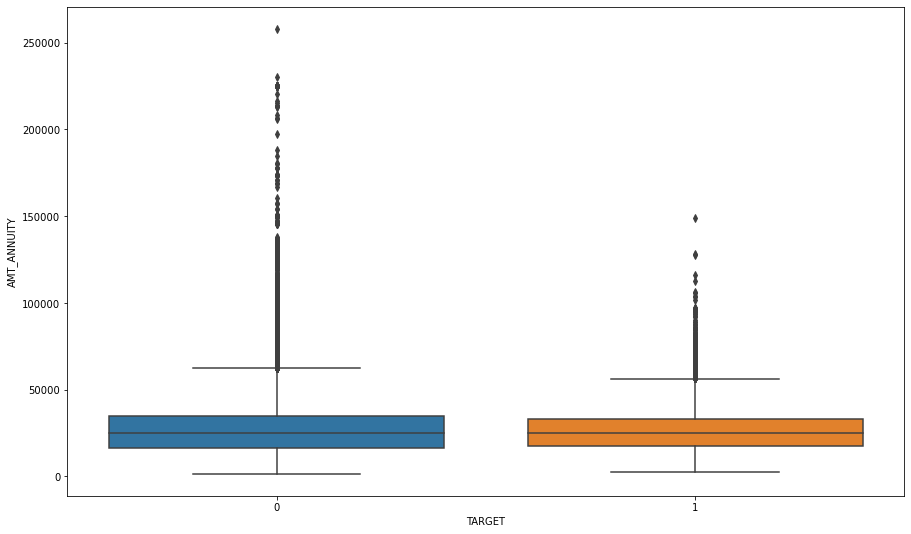

In [37]:
plt.figure(figsize=[15,9])
sns.boxplot(curr_appl_data.TARGET,curr_appl_data['AMT_ANNUITY'])
plt.show()

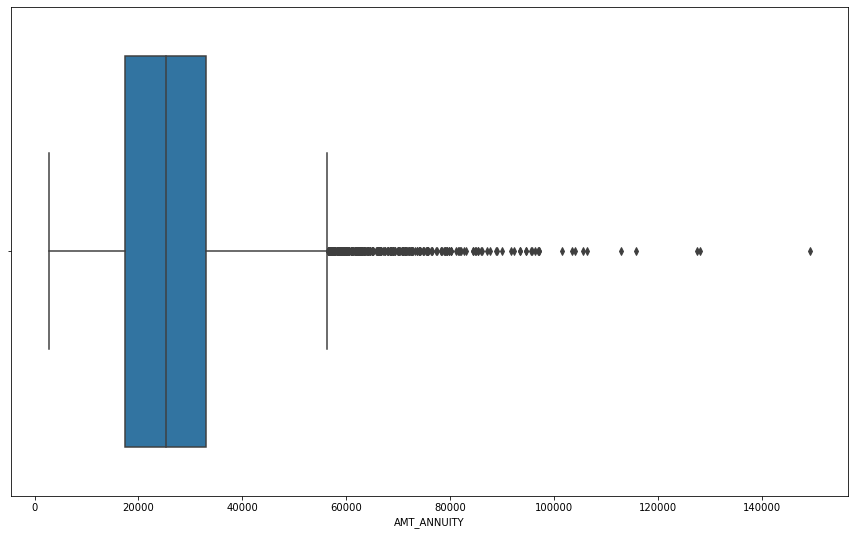

In [33]:
plt.figure(figsize=[15,9])
sns.boxplot(curr_appl_data_payDifficulties.AMT_ANNUITY)
plt.show()

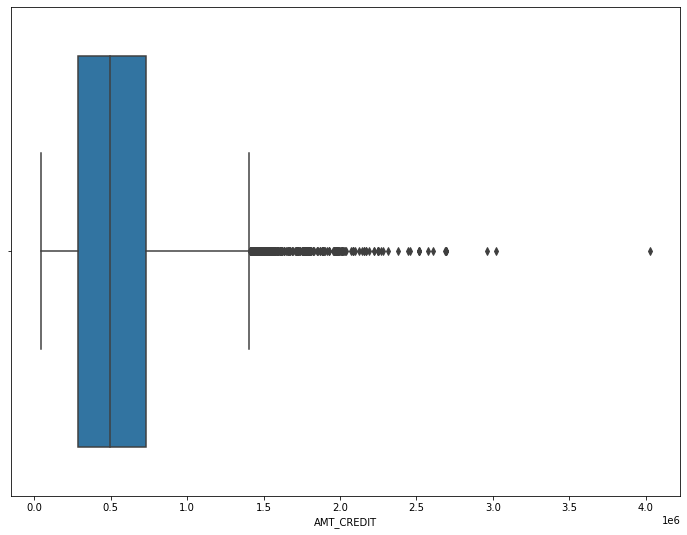

In [22]:
plt.figure(figsize=[12,9])
sns.boxplot(curr_appl_data_payDifficulties.AMT_CREDIT)
plt.show()

In [23]:
curr_appl_data_payDifficulties[(curr_appl_data_payDifficulties['AMT_ANNUITY']>40000) & (curr_appl_data_payDifficulties['AMT_ANNUITY']<70000)].shape

(3114, 67)

In [34]:
curr_appl_data_payDifficulties[curr_appl_data_payDifficulties['AMT_ANNUITY']>60000].shape

(335, 67)

In [25]:
curr_appl_data_payDifficulties['CNT_CHILDREN'].value_counts(normalize=True)

0     0.669043
1     0.219698
2     0.093978
3     0.014421
4     0.002216
5     0.000282
6     0.000242
9     0.000081
11    0.000040
Name: CNT_CHILDREN, dtype: float64

In [27]:
curr_appl_data_payDifficulties[curr_appl_data_payDifficulties['AMT_INCOME_TOTAL']<1000].shape

(0, 67)